In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sabuc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sabuc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv('preprocessed_fake_review_dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [5]:
df.isnull().sum()

Unnamed: 0    0
category      0
rating        0
label         0
text_         1
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40432 non-null  int64  
 1   category    40432 non-null  object 
 2   rating      40432 non-null  float64
 3   label       40432 non-null  object 
 4   text_       40431 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


In [7]:
df.describe()

,Unnamed: 0,rating
count,40432.000000,40432.000000
mean,20215.500000,4.256579
std,11671.857379,1.144354
min,0.000000,1.000000
25%,10107.750000,4.000000
50%,20215.500000,5.000000
75%,30323.250000,5.000000
max,40431.000000,5.000000


In [8]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

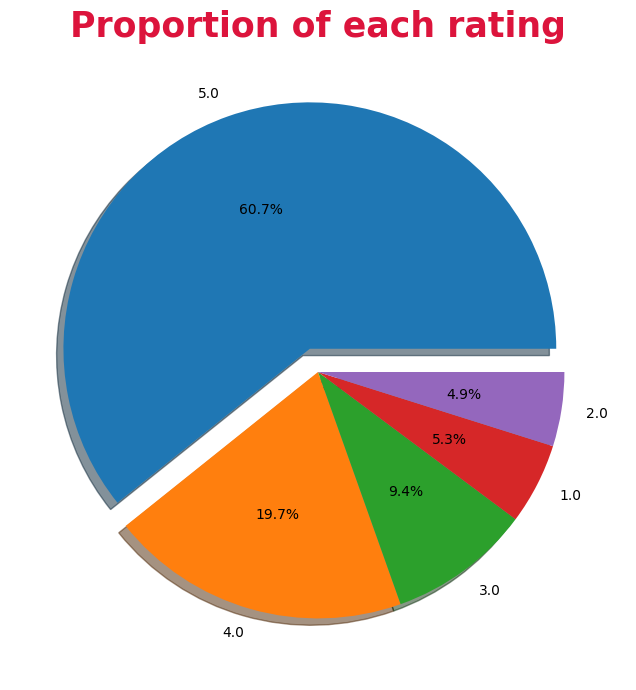

In [9]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [10]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [11]:
import nltk

In [12]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabuc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
df['text_'][0], clean_text(df['text_'][0])

('love well made sturdi comfort i love veri pretti',
 'love well made sturdi comfort love veri pretti')

In [14]:
df['text_'].head().apply(clean_text)

0    love well made sturdi comfort love veri pretti
1          love great upgrad origin mine coupl year
2        thi pillow save back love look feel pillow
3               miss inform use great product price
4          veri nice set good qualiti set two month
Name: text_, dtype: object

In [15]:
df.shape

(40432, 5)

In [16]:
df['text_'] = df['text_'].astype(str)

In [17]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sabuc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
preprocess(df['text_'][4])

'veri nice set good qualiti set two month'

In [21]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [22]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [23]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [24]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [25]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [26]:
df['text_'] = df['text_'].str.lower()

In [27]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [28]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [29]:
df['text_'].head()

0    love well made sturdi comfort love veri pretti
1          love great upgrad origin mine coupl year
2        thi pillow save back love look feel pillow
3               miss inform use great product price
4          veri nice set good qualiti set two month
Name: text_, dtype: object

In [30]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [32]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,category,rating,label,text_
0,0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love veri pretti
1,1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin mine coupl year
2,2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back love look feel pillow
3,3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti set two month


In [33]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
df.head()

,Unnamed: 0.1,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti set two month


In [35]:
df.dropna(inplace=True)

In [36]:
df['length'] = df['text_'].apply(len)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  40431 non-null  int64  
 1   category      40431 non-null  object 
 2   rating        40431 non-null  float64
 3   label         40431 non-null  object 
 4   text_         40431 non-null  object 
 5   length        40431 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.2+ MB


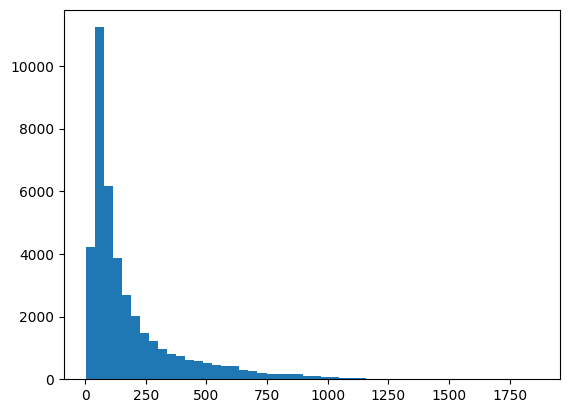

In [38]:
plt.hist(df['length'],bins=50)
plt.show()

In [39]:
df.groupby('label').describe()

Unnamed: 0.1                                                       \
             count          mean           std   min       25%      50%   
label                                                                     
CG         20215.0  20204.464457  11672.088425   0.0  10100.50  20192.0   
OR         20216.0  20225.659527  11671.530296  55.0  10114.75  20225.5   

                           rating            ...             length  \
            75%      max    count      mean  ...  75%  max    count   
label                                        ...                      
CG     30320.50  40430.0  20215.0  4.259906  ...  5.0  5.0  20215.0   
OR     30338.25  40431.0  20216.0  4.253265  ...  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     154.646896  155.315683  4.0  51.0   88.0  192.0  1186.0  
OR     218.962307  232.273064  8.0  68.0  123.0  272.0  1863.0  

[2 rows x 24 columns]

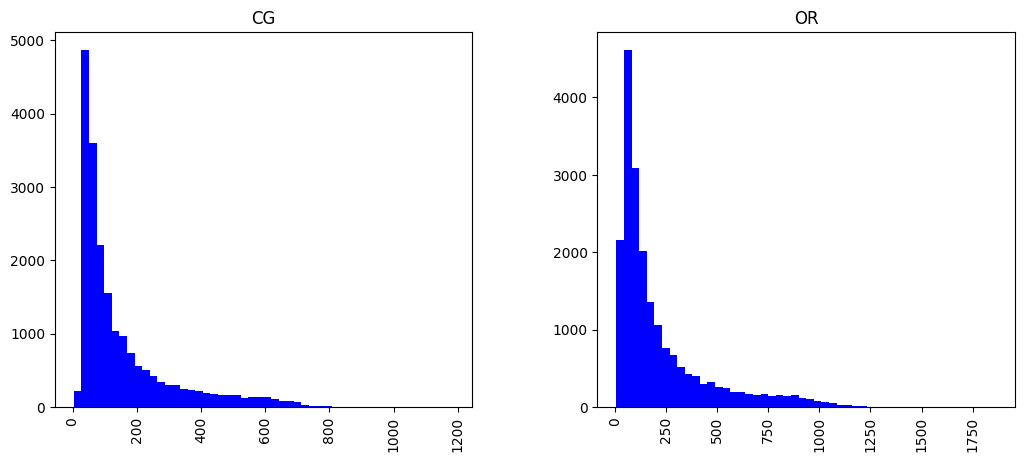

In [40]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [41]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

'weak current scienc see twice agr much posit five star review respect read review ill repeat everyth like present found goofi over ear hairdo facial hair arrang daniel vitali describ wild food expert distract ugh ditto david wolf extrem goofi wild hairdo hand jon gabriel describ author weight loss expert nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america cutest doctor realli nice look woman present dr mercola jason vale kri carr alejandro junger fine disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor colin campbel milk bodi bad good see present take stand sugar agr evil sugar refin carbohydr respect dr northrup fat make fat sugar statement pas muster commun expert recogn evil sugar mutual exclu recogn proven danger fat particularli fat dead anim extract fat kind oliv oil health food datahookproductlinklink classa

In [42]:
df.length.describe()

count    40431.000000
mean       186.805397
std        200.175962
min          4.000000
25%         58.000000
50%        105.000000
75%        230.000000
max       1863.000000
Name: length, dtype: float64

In [43]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [44]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001D580832C00>)

In [45]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 36016


In [46]:
review4 = df['text_'][3]
review4

'miss inform use great product price'

In [47]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13704)	1
  (0, 16257)	1
  (0, 20500)	1
  (0, 24748)	1
  (0, 24891)	1
  (0, 33600)	1
(1, 36016)


In [48]:
print(bow_transformer.get_feature_names_out()[15841])
print(bow_transformer.get_feature_names_out()[23848])

idvideoblockr13nrmaer1k3u8
phoeb


In [49]:
bow_reviews = bow_transformer.transform(df['text_'])

In [50]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 36016)
Amount of non zero values in the bag of words model: 1018082


In [51]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [52]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13704)	1
  (0, 16257)	1
  (0, 20500)	1
  (0, 24748)	1
  (0, 24891)	1
  (0, 33600)	1


In [53]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.8236741309927584


In [54]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 36016)
No. of Dimensions: 2


In [55]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [56]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [57]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D580832C00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [58]:
predictions = pipeline.predict(review_test)
predictions

array(['CG', 'OR', 'OR', ..., 'CG', 'OR', 'OR'], dtype='<U2')

In [59]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.83      0.88      0.85      7097
          OR       0.87      0.82      0.84      7054

    accuracy                           0.85     14151
   macro avg       0.85      0.85      0.85     14151
weighted avg       0.85      0.85      0.85     14151

Confusion Matrix: [[6259  838]
 [1304 5750]]
Accuracy Score: 0.8486326054695781


In [60]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 84.86%


In [61]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [62]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D580832C00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [63]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['CG', 'OR', 'OR', ..., 'CG', 'OR', 'CG'], dtype=object)

In [64]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.80      0.89      0.84      7097
          OR       0.88      0.78      0.83      7054

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[6319  778]
 [1541 5513]]
Accuracy Score: 0.836124655501378
Model Prediction Accuracy: 83.61%


In [65]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [66]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D580832C00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [67]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['CG', 'OR', 'OR', ..., 'CG', 'CG', 'OR'], dtype=object)

In [68]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.74      0.76      0.75      7097
          OR       0.75      0.72      0.74      7054

    accuracy                           0.74     14151
   macro avg       0.74      0.74      0.74     14151
weighted avg       0.74      0.74      0.74     14151

Confusion Matrix: [[5410 1687]
 [1950 5104]]
Accuracy Score: 0.7429863613878878
Model Prediction Accuracy: 74.3%


In [69]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [70]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D580832C00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [71]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [72]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.54      0.97      0.70      7097
          OR       0.87      0.18      0.30      7054

    accuracy                           0.58     14151
   macro avg       0.71      0.58      0.50     14151
weighted avg       0.71      0.58      0.50     14151

Confusion Matrix: [[6899  198]
 [5761 1293]]
Accuracy Score: 0.5788990177372624
Model Prediction Accuracy: 57.89%


In [73]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [74]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D580832C00>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [75]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['CG', 'OR', 'OR', ..., 'CG', 'OR', 'OR'], dtype=object)

In [76]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.87      0.88      7097
          OR       0.87      0.89      0.88      7054

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix: [[6161  936]
 [ 741 6313]]
Accuracy Score: 0.8814924740301039
Model Prediction Accuracy: 88.15%


In [77]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [78]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D580832C00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [79]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['CG', 'OR', 'OR', ..., 'CG', 'OR', 'OR'], dtype=object)

In [80]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.87      0.86      0.86      7097
          OR       0.86      0.87      0.87      7054

    accuracy                           0.87     14151
   macro avg       0.87      0.87      0.87     14151
weighted avg       0.87      0.87      0.87     14151

Confusion Matrix: [[6087 1010]
 [ 891 6163]]
Accuracy Score: 0.8656632040138507
Model Prediction Accuracy: 86.57%


In [81]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.57%
K Nearest Neighbors Prediction Accuracy: 57.89%
Decision Tree Classifier Prediction Accuracy: 74.3%
Random Forests Classifier Prediction Accuracy: 83.61%
Support Vector Machines Prediction Accuracy: 88.15%
Multinomial Naive Bayes Prediction Accuracy: 84.86%


In [85]:
newtest=["Wow amazing prodct"]
svc_pred = pipeline.predict(newtest)
print(svc_pred)

['OR']


In [87]:
pipeline.fit(review_test,label_test)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D580832C00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [89]:
import joblib
joblib.dump(pipeline,'model')


['model']

In [91]:
model1 = joblib.load('model')
model1.predict(newtest)

array(['OR'], dtype=object)